# Synapsys Pipeline Demo

In [5]:
import sys
import scipy.io as sio
import matplotlib.pyplot as plt
import numpy as np
sys.path.insert(0, '../code/functions')
sys.path.insert(0, '../code/cloud')

## Input Image:

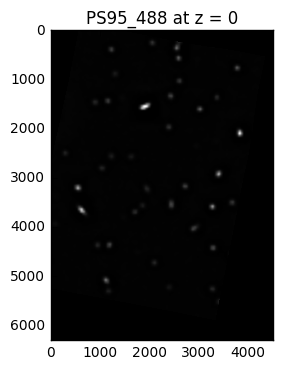

In [2]:
rawData = sio.loadmat('../data/PSD95_488_p1.mat')
name = 'PSD95_488'
data = rawData['PSD95_488']
plt.imshow(data[:,:,0], cmap = "gray")
plt.title('PS95_488 at z = 0')
plt.show()

## Upload Data to S3

In [2]:
import cloudy
import time

cloudy.uploadData('synapsysndd', '../data/PSD95_488_p1.mat', 'PSD95_cloud.mat') #input S3 bucket, file location, and file key
time.sleep(20) #To make sure data is uploaded before continuing!

## Submit Job on the Cloud!

In [4]:
cloudy.submitJob('synapsysndd', 'PSD95_cloud.mat') #input S3 bucket and file key

Using existing Compute Environment.
Using existing Job Queue.
Created job definition
Submitted Job


## Visit https://console.aws.amazon.com/batch/ to see your job!

## After job is completed, download and view the results from your S3 Bucket!

In [3]:
cloudy.getResults('synapsysndd', '../results', 'PSD95_cloud.mat') #input bucket, result path, and file key

'PSD95_cloud.mat'

In [4]:
import pickle
results = pickle.load(open('../results/PSD95_cloud.mat', 'rb'))
plt.imshow(results[0], 'rb')
plt.title('PSD95 Cloud Results at z = 0')
plt.show()

IOError: [Errno 2] No such file or directory: '../results/PSD95_cloud.mat'